In [1]:
# Library
from tensorflow.keras.datasets import mnist

In [2]:
# train - test splitting
train_images, train_labels = mnist.load_data()[0]
test_images, test_labels = mnist.load_data()[1]

print("Shape of train images", train_images.shape)
print("Shape of test images", test_images.shape)

Shape of train images (60000, 28, 28)
Shape of test images (10000, 28, 28)


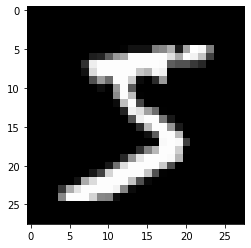

In [3]:
from matplotlib import pyplot as plt
plt.imshow(train_images[0], cmap="gray")
# plt.show()


In [4]:
# preparing data

"""
3D --> 4D
Normalization --> /255
"""
# 3D --> 4D
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)
print("Shape of train images", train_images.shape)
print("Shape of test images", test_images.shape)


# type casting
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")


# Normalization --> /255 --- 0 ile 1 arasına sıkıstırma
train_images /= 255
test_images /= 255


Shape of train images (60000, 28, 28, 1)
Shape of test images (10000, 28, 28, 1)


In [5]:
input_shape = (28,28,1)

In [6]:
# libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

# creating networks
model = Sequential()

model.add(Conv2D(28,kernel_size=(3,3),input_shape= input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax")) # kac cikti olabilir o yazılır 0,9 arası rakmalr max 9 cikti olabilir.
# softmax fonk. -1,1 arası degisir ve bir olasılık degeri uretir

In [7]:
# compiling model
"""
 “adam” (Adaptive Moment Estimation) algoritması, her bir parametre için gerçek zamanlı olarak öğrenme oranını günceller.
"""
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
              metrics= ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
# fitting model
history = model.fit(x= train_images,
                   y= train_labels,
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2087 - accuracy: 0.9374
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0827 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0579 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0431 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0356 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0283 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0231 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0203 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [9]:
# evaluating model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test loss : ",test_loss)
print("Test accuracy : ",test_accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9848
Test loss :  0.06215193495154381
Test accuracy :  0.9847999811172485


In [10]:
history_dicts = history.history
print(history_dicts.keys())

dict_keys(['loss', 'accuracy'])


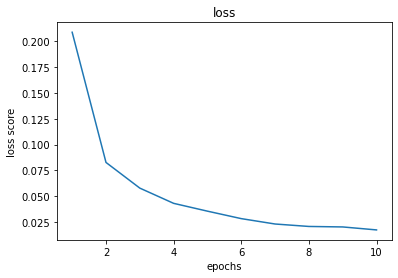

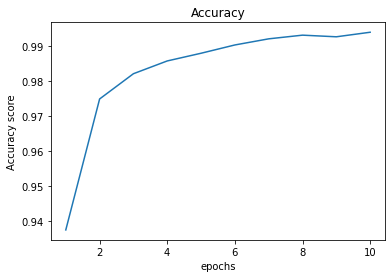

In [11]:
# loss, accuracy graph
from matplotlib import pyplot as plt

epochs = range(1,11)
loss= history_dicts["loss"]
accuracy = history_dicts["accuracy"]

plt.plot(epochs, loss)
plt.title("loss")
plt.ylabel("loss score")
plt.xlabel("epochs")
plt.show()

plt.plot(epochs, accuracy)
plt.title("Accuracy")
plt.ylabel("Accuracy score")
plt.xlabel("epochs")
plt.show()

In [12]:
# saving model
model.save("model_mnist.h5") # h5 uzantılı olmalı

predicted number :  4


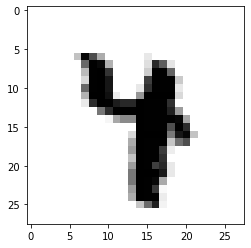

array([[3.3326104e-19, 1.3405440e-07, 4.3403672e-17, 3.7478826e-12,
        9.9973267e-01, 1.1035121e-17, 3.5670116e-15, 2.6721082e-04,
        3.2524403e-10, 2.1202435e-08]], dtype=float32)

In [16]:
# loading model and prediction
from keras.models import load_model
import random

model = load_model("model_mnist.h5")

i = random.randint(1,5000)

prediction = model.predict(test_images[i].reshape(1,28,28,1))
print("predicted number : ", prediction.argmax()) # argmax() en yüksek degerin indexini verir

plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()




